## Importing the Necessary Libraries

In [166]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt #Static Data Visualisation
import seaborn as sns #For Advance Visualisation
import numpy as np

from sklearn.model_selection import train_test_split #For splitting the data into training and testing sets

#Using Scikit-learn classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

#Using Artificial Neural Network(ANN) model
from tensorflow.keras.layers import Dense
from tensorflow import keras

#Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Saving the model
import pickle as pk

#Filter warnings to enable clean codes when executed
import warnings
warnings.filterwarnings('ignore') 

In [167]:
#Loading the data into a dataframe df
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

## Exploratory Data Analysis

In [169]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 299 rows and 13 columns


In [170]:
df.info() #data summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [171]:
df.columns = df.columns.str.lower() #Convert all columns to lower case

In [172]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [173]:
df.duplicated().sum()

0

In [194]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
71,58.0,0,582,1,35,0,122000.0,0.90,139,1,1,71,0
39,60.0,0,235,1,38,0,329000.0,3.00,142,0,0,30,1
115,58.0,1,400,0,40,0,164000.0,1.00,139,0,0,91,0
230,60.0,0,166,0,30,0,62000.0,1.70,127,0,0,207,1
122,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95,0


In [175]:
#Checking for the statistical summary of the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


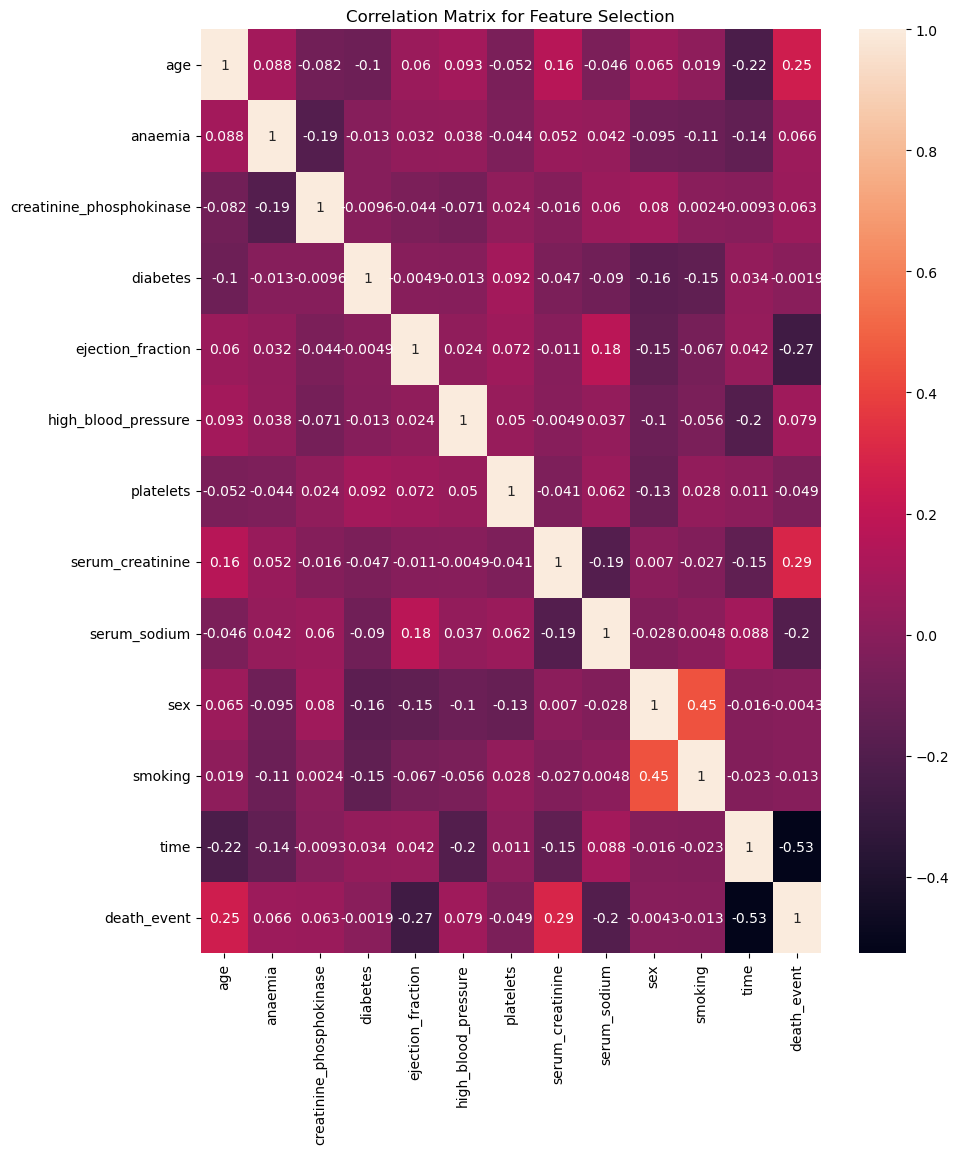

In [176]:
plt.figure(figsize=(10,12)) #Checking for features that can leads to redundancy and leakage in training and testing the model
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix for Feature Selection");

## Data Splitting

In [178]:
#Splitting data into target and feature variables y and X respectively
y = df.death_event
X = df.drop("death_event",axis=1)

In [179]:
#Splitting data into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=2)

In [180]:
#Dictionary containing the individual models
models = {
    "logisticReg":LogisticRegression(),
    "GBClassifier":GradientBoostingClassifier(),
    "RFClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [181]:
for name, mdl in models.items():
    model = mdl.fit(X_train,y_train)
    print("Model Name : ",name)
    print("Score : ",round(model.score(X_test,y_test),3))
    print("MAE : ",round(mean_absolute_error(y_test,model.predict(X_test)),3))
    print("MSE : ",round(mean_squared_error(y_test,model.predict(X_test)),3))

Model Name :  logisticReg
Score :  0.85
MAE :  0.15
MSE :  0.15
Model Name :  GBClassifier
Score :  0.9
MAE :  0.1
MSE :  0.1
Model Name :  RFClassifier
Score :  0.95
MAE :  0.05
MSE :  0.05
Model Name :  XGBClassifier
Score :  0.95
MAE :  0.05
MSE :  0.05


In [190]:
# Save RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train,y_train)

with open("death-predictive.pkl","wb") as file:
    pk.dump(model,file)

In [ ]:
  #ANN

In [146]:
modelA = keras.Sequential([
    Dense(10,input_shape=(12,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(5,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [151]:
modelA.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [153]:
history = modelA.fit(X_train,
           y_train,
           epochs=20,
           validation_data=(X_test,y_test),
          )

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - accuracy: 0.4115 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.6967 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.6843 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.6917 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.6497 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.6679 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.6760 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.0000e+00
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: